## a. Import Package

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## b. Load Datasets

In [12]:
train = pd.read_csv('application_train.csv')

In [13]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
train.shape

(307511, 122)

In [15]:
train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [16]:
train.duplicated().sum()

0

In [9]:
import dtale
dtale.show(train)

2021-06-09 20:08:56,040 - INFO     - NumExpr defaulting to 4 threads.


In [10]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(train,minimal=True)
profile.to_file(output_file="Home Credit Train.html")

In [ ]:
profile2 = ProfileReport(test,minimal=True)
profile2.to_file(output_file="Home Credit Test.html")

# **Pre-processing**

# **Change days to absolute no.**

In [17]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].abs()
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].abs()
train['DAYS_REGISTRATION'] = train['DAYS_REGISTRATION'].abs()
train['DAYS_ID_PUBLISH'] = train['DAYS_ID_PUBLISH'].abs()
train['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE'].abs()

train_msmr_60 : missing values lebih dari 60%
train_msls_60 : missing values kurang dari 60%

# **Columns with >60% missing values**

In [18]:
# contain null values >60%
train_msmr_60 = ['OWN_CAR_AGE','YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG',
                 'NONLIVINGAPARTMENTS_AVG','YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE',
                 'NONLIVINGAPARTMENTS_MODE','YEARS_BUILD_MEDI','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI',
                 'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE']

In [19]:
train = train.drop(train_msmr_60,1)

In [20]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [21]:
train.shape

(307511, 105)

In [22]:
train_msls_60 = ['OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 
                 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 
                 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
                 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE',
                 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
                 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                 'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']

## **After drop null columns above 60**

In [23]:
train_miss = pd.DataFrame(train,columns=train_msls_60)

In [24]:
train_miss.head()

,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,...,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
0,Laborers,0.083037,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,...,No,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,1134.0,0.262949
1,Core staff,0.311267,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,...,No,0.0,0.0,0.0,0.0,0.0,0.0,Family,828.0,0.622246
2,Laborers,NaN,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,815.0,0.555912
3,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,617.0,0.650442
4,Core staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,1106.0,0.322738


In [25]:
pd.options.display.float_format = '{:.2f}'.format
train_miss.describe()

,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,...,NONLIVINGAREA_MEDI,TOTALAREA_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2
count,134133.00,246546.00,151450.00,127568.00,157504.00,143620.00,152683.00,154491.00,124921.00,153161.00,...,137829.00,159080.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00,307510.00,306851.00
mean,0.50,0.51,0.12,0.09,0.98,0.08,0.15,0.23,0.07,0.11,...,0.03,0.10,0.01,0.01,0.03,0.27,0.27,1.90,962.86,0.51
std,0.21,0.19,0.11,0.08,0.06,0.13,0.10,0.14,0.08,0.11,...,0.07,0.11,0.08,0.11,0.20,0.92,0.79,1.87,826.81,0.19
min,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.33,0.37,0.06,0.04,0.98,0.00,0.07,0.17,0.02,0.05,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,274.00,0.39
50%,0.51,0.54,0.09,0.08,0.98,0.00,0.14,0.17,0.05,0.07,...,0.00,0.07,0.00,0.00,0.00,0.00,0.00,1.00,757.00,0.57
75%,0.68,0.67,0.15,0.11,0.99,0.12,0.21,0.33,0.09,0.13,...,0.03,0.13,0.00,0.00,0.00,0.00,0.00,3.00,1570.00,0.66
max,0.96,0.90,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00,4292.00,0.85


In [26]:
# After drop null columns (above 60%)
train_miss.shape

(307511, 43)

In [27]:
train_miss.select_dtypes('number').columns

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2'],
      dtype='object')

`EXT_SOURCE_1`, `EXT_SOURCE_3`, `DAYS_LAST_PHONE_CHANGE`, `EXT_SOURCE_2` are normally distributed, so we will imput `mean` to the missing values. And we will imput the `median` to the leftover features with data type `number`.

In [28]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# **Handling Missing Values**

In [29]:
train_miss.select_dtypes('number').skew().abs()<1

EXT_SOURCE_1                     True
EXT_SOURCE_3                     True
APARTMENTS_AVG                  False
BASEMENTAREA_AVG                False
YEARS_BEGINEXPLUATATION_AVG     False
ELEVATORS_AVG                   False
ENTRANCES_AVG                   False
FLOORSMAX_AVG                   False
LANDAREA_AVG                    False
LIVINGAREA_AVG                  False
NONLIVINGAREA_AVG               False
APARTMENTS_MODE                 False
BASEMENTAREA_MODE               False
YEARS_BEGINEXPLUATATION_MODE    False
ELEVATORS_MODE                  False
ENTRANCES_MODE                  False
FLOORSMAX_MODE                  False
LANDAREA_MODE                   False
LIVINGAREA_MODE                 False
NONLIVINGAREA_MODE              False
APARTMENTS_MEDI                 False
BASEMENTAREA_MEDI               False
YEARS_BEGINEXPLUATATION_MEDI    False
ELEVATORS_MEDI                  False
ENTRANCES_MEDI                  False
FLOORSMAX_MEDI                  False
LANDAREA_MED

In [30]:
train_miss_mean = ['EXT_SOURCE_1','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']

In [31]:
# handling missing values with mean
for col in train_miss_mean:
    train[col].fillna(train[col].mean(),inplace=True)

In [32]:
train_miss_med = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']

In [33]:
# handling missing values with median
for col in train_miss_med:
    train[col].fillna(train[col].median(),inplace=True)

In [34]:
train_miss.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE'],
      dtype='object')

In [35]:
train_miss_mode = ['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE']

In [36]:
# handling missing values with mode
for col in train_miss_mode:
    train[col].fillna(train[col].mode()[0],inplace=True)

`'CNT_CHILDREN'` and `'CNT_FAM_MEMBERS'` have a high correlation.

`'AMT_GOODS_PRICE'` and `'AMT_CREDIT'` are perfectly correlated.

`'AMT_GOODS_PRICE'` and `'AMT_ANNUITY'` have a high correlation.

`'AMT_ANNUITY'` and `'AMT_CREDIT'` have a high correlation.

`'OBS_30_CNT_SOCIAL_CIRCLE'` and `'OBS_60_CNT_SOCIAL_CIRCLE'` are perfectly correlated.

`'DEF_30_CNT_SOCIAL_CIRCLE'` and `'DEF_60_CNT_SOCIAL_CIRCLE'` have a high correlation.

We decide to erase one of each pairs (we choose to delete the correlation to 'TARGET' that is closer to 0, except `'AMT_GOODS_PRICE'` and `'AMT_ANNUITY'`

In [37]:
train_close = ['CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']

In [38]:
train = train.drop(train_close,1)

# Feature Encoding

In [39]:
cats = train.select_dtypes('object')

In [40]:
cats.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

In [43]:
train['NAME_CONTRACT_TYPE']=le.fit_transform(train['NAME_CONTRACT_TYPE'])
train['CODE_GENDER']=le.fit_transform(train['CODE_GENDER'])
train['FLAG_OWN_CAR']=le.fit_transform(train['FLAG_OWN_CAR'])
train['FLAG_OWN_REALTY']=le.fit_transform(train['FLAG_OWN_REALTY'])
train['NAME_TYPE_SUITE']=le.fit_transform(train['NAME_TYPE_SUITE'])
train['NAME_INCOME_TYPE']=le.fit_transform(train['NAME_INCOME_TYPE'])
train['NAME_EDUCATION_TYPE']=le.fit_transform(train['NAME_EDUCATION_TYPE'])
train['NAME_FAMILY_STATUS']=le.fit_transform(train['NAME_FAMILY_STATUS'])
train['NAME_HOUSING_TYPE']=le.fit_transform(train['NAME_HOUSING_TYPE'])
train['OCCUPATION_TYPE']=le.fit_transform(train['OCCUPATION_TYPE'])
train['WEEKDAY_APPR_PROCESS_START']=le.fit_transform(train['WEEKDAY_APPR_PROCESS_START'])
train['ORGANIZATION_TYPE']=le.fit_transform(train['ORGANIZATION_TYPE'])
train['HOUSETYPE_MODE']=le.fit_transform(train['HOUSETYPE_MODE'])
train['WALLSMATERIAL_MODE']=le.fit_transform(train['WALLSMATERIAL_MODE'])
train['EMERGENCYSTATE_MODE']=le.fit_transform(train['EMERGENCYSTATE_MODE'])

In [44]:
train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
187426,317273,0,0,0,0,0,0,157500.00,808650.00,6,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
216670,351055,0,1,0,0,1,0,112500.00,180000.00,6,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
47523,155042,0,0,0,0,0,2,157500.00,808650.00,6,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
29381,134119,0,0,0,0,1,0,112500.00,958131.00,6,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
179003,307433,0,1,0,0,1,1,112500.00,180000.00,6,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
X = train.drop(['TARGET','SK_ID_CURR'],1)
y = train['TARGET']

In [40]:
y.value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

<AxesSubplot:ylabel='TARGET'>

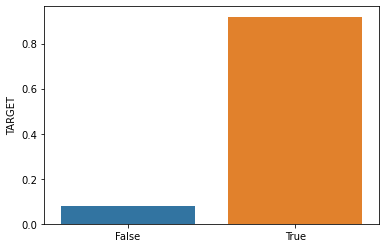

In [71]:
sns.barplot(x = [True,False],y = y.value_counts(normalize=True))

# Anova (Feature Selection)

In [41]:
X.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG

In [42]:
feats = X.columns

In [43]:
from sklearn.feature_selection import f_classif
anova = pd.DataFrame(f_classif(X,y)).transpose()

In [44]:
anova.columns = ['f-score','p-value']

In [45]:
anova['columns_name'] = feats

In [46]:
# urutan feature penting bisa dilihat dari nilai f-score terbesar ke terkecil
anova.sort_values('f-score',ascending=False).head(30)

,f-score,p-value,columns_name
35,8110.51,0.00,EXT_SOURCE_2
36,7811.66,0.00,EXT_SOURCE_3
34,3053.20,0.00,EXT_SOURCE_1
13,1893.98,0.00,DAYS_BIRTH
24,1144.46,0.00,REGION_RATING_CLIENT_W_CITY
23,1070.49,0.00,REGION_RATING_CLIENT
70,940.49,0.00,DAYS_LAST_PHONE_CHANGE
9,922.81,0.00,NAME_EDUCATION_TYPE
1,922.59,0.00,CODE_GENDER
31,801.74,0.00,REG_CITY_NOT_WORK_CITY


In [47]:
# Chosen Features (30 highest f-score)
chosen_feats = ['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
               'DAYS_LAST_PHONE_CHANGE','NAME_EDUCATION_TYPE','CODE_GENDER','REG_CITY_NOT_WORK_CITY','DAYS_EMPLOYED',
               'NAME_INCOME_TYPE','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','DAYS_REGISTRATION',
               'FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','REGION_POPULATION_RELATIVE','ELEVATORS_AVG',
               'ELEVATORS_MEDI','NAME_HOUSING_TYPE','ELEVATORS_MODE','LIVE_CITY_NOT_WORK_CITY','DEF_60_CNT_SOCIAL_CIRCLE',
               'NAME_CONTRACT_TYPE','ORGANIZATION_TYPE','AMT_CREDIT','TOTALAREA_MODE']

In [48]:
X = pd.DataFrame(train,columns=chosen_feats)

In [49]:
X

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,REG_CITY_NOT_WORK_CITY,...,ELEVATORS_AVG,ELEVATORS_MEDI,NAME_HOUSING_TYPE,ELEVATORS_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,AMT_CREDIT,TOTALAREA_MODE
0,0.26,0.14,0.08,9461,2,2,1134.00,4,1,0,...,0.00,0.00,1,0.00,0,2.00,0,5,406597.50,0.01
1,0.62,0.51,0.31,16765,1,1,828.00,1,0,0,...,0.08,0.08,1,0.08,0,0.00,0,39,1293502.50,0.07
2,0.56,0.73,0.50,19046,2,2,815.00,4,1,0,...,0.00,0.00,1,0.00,0,0.00,1,11,135000.00,0.07
3,0.65,0.51,0.50,19005,2,2,617.00,4,0,0,...,0.00,0.00,1,0.00,0,0.00,0,5,312682.50,0.07
4,0.32,0.51,0.50,19932,2,2,1106.00,4,1,1,...,0.00,0.00,1,0.00,1,0.00,0,37,513000.00,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.68,0.51,0.15,9327,1,1,273.00,4,1,0,...,0.22,0.22,5,0.08,0,0.00,0,43,254700.00,0.29
307507,0.12,0.51,0.50,20775,2,2,0.00,4,0,0,...,0.00,0.00,1,0.00,0,0.00,0,57,269550.00,0.02
307508,0.54,0.22,0.74,14966,3,3,1909.00,1,0,1,...,0.00,0.00,1,0.00,1,0.00,0,39,677664.00,0.80
307509,0.51,0.66,0.50,11961,2,2,322.00,4,0,1,...,0.00,0.00,1,0.00,0,0.00,0,3,370107.00,0.01


# Model Accuration

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)
X_transform

In [50]:
def model_accuration(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 123)

In [69]:
y_train.value_counts()

0    197880
1     17377
Name: TARGET, dtype: int64

# Under Sampling

In [56]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(random_state=123)

In [57]:
X_under, y_under = undersampling.fit_resample(X_train, y_train)

In [58]:
X_under = pd.DataFrame(X_under, columns=X.columns)

In [59]:
y_under = pd.DataFrame(y_under)

In [60]:
y_under.value_counts()

TARGET
1         17377
0         17377
dtype: int64

In [61]:
y_under.value_counts(normalize=True)

TARGET
1        0.50
0        0.50
dtype: float64

<AxesSubplot:>

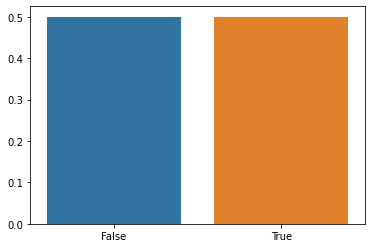

In [62]:
sns.barplot(x=[True,False], y=y_under.value_counts(normalize=True))

# Min Max Scaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X_under)
X_transform = pd.DataFrame(X_transform,columns = X.columns)

In [64]:
X_transform

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,REG_CITY_NOT_WORK_CITY,...,ELEVATORS_AVG,ELEVATORS_MEDI,NAME_HOUSING_TYPE,ELEVATORS_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,AMT_CREDIT,TOTALAREA_MODE
0,0.89,0.80,0.56,0.27,0.00,0.00,0.12,1.00,0.00,0.00,...,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.09,0.19,0.07
1,0.39,0.27,0.27,0.13,0.50,1.00,0.29,1.00,0.00,0.00,...,0.16,0.16,1.00,0.16,0.00,0.00,0.00,0.09,0.06,0.16
2,0.92,0.59,0.51,0.63,0.00,0.00,0.11,1.00,0.00,1.00,...,0.00,0.00,0.20,0.00,1.00,0.00,0.00,0.30,0.16,0.02
3,0.35,0.78,0.66,0.63,0.50,0.50,0.40,1.00,0.00,0.00,...,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.09,0.05,0.04
4,0.38,0.61,0.54,0.30,0.50,0.50,0.03,1.00,0.00,0.00,...,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.07,0.21,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34749,0.77,0.27,0.38,0.54,0.00,0.00,0.50,0.25,0.00,1.00,...,0.80,0.80,0.20,0.81,1.00,0.00,0.00,0.68,0.15,1.00
34750,0.83,0.57,0.51,0.62,1.00,1.00,0.00,1.00,0.50,0.00,...,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.58,0.05,0.02
34751,0.18,0.16,0.51,0.43,0.50,0.50,0.00,1.00,0.50,0.00,...,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.07,0.10,0.07
34752,0.58,0.32,0.51,0.27,1.00,1.00,0.05,0.50,0.00,0.00,...,0.00,0.00,0.20,0.00,0.00,0.20,0.00,0.19,0.05,0.07


## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_transform,y_under)

/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
model_accuration(logreg,X_test,y_test)

0.9192663732737876

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
model_accuration(dtc,X_test,y_test)

0.8504671884145945

# Model Validation

In [78]:
from sklearn import model_selection

In [80]:
# Model decision tree
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = DecisionTreeClassifier()
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='roc_auc')
print("ROC AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ROC AUC: 54.054% (0.326%)


In [81]:
# Model logistic regression
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='roc_auc')
print("ROC AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ROC AUC: 59.934% (0.444%)


# GridSearchCV

In [88]:
params = {'max_depth':[3,5,7,9,11,'max']} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [89]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=dtc,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [90]:
grid.fit(X_train,y_train)

/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.91927324 0.9192082  0.91870647 0.91734995 0.91502715        nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 'max']},
             scoring='accuracy')

In [91]:
model_accuration(grid,X_test,y_test)

0.9192663732737876

In [92]:
grid.best_score_

0.9192732412403961

In [93]:
grid.best_params_

{'max_depth': 3}